# Inner Join

In [24]:
import pandas as pd

gdp = pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/gdp.csv")
gdp= gdp.rename(columns={"Country Name": "Country"})
gdp.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [25]:
pop = pd.read_csv(r"c:/users/danhaya/arewads/world-population-dynamics/data/processed_data/processed_data.csv")
pop = pop.rename(columns={"Country/Territory": "Country"})
print(pop.head())

   Unnamed: 0  Rank CCA3         Country           Capital Continent  \
0           0    36  AFG     Afghanistan             Kabul      Asia   
1           1   138  ALB         Albania            Tirana    Europe   
2           2    34  DZA         Algeria           Algiers    Africa   
3           3   213  ASM  American Samoa         Pago Pago   Oceania   
4           4   203  AND         Andorra  Andorra la Vella    Europe   

   2022 Population  2020 Population  2015 Population  2010 Population  \
0         41128771         38972230         33753499         28189672   
1          2842321          2866849          2882481          2913399   
2         44903225         43451666         39543154         35856344   
3            44273            46189            51368            54849   
4            79824            77700            71746            71519   

   2000 Population  1990 Population  1980 Population  1970 Population  \
0         19542982         10694796         12486631   

In [ ]:
gdp.shape

(266, 64)

In [ ]:
pop.shape

(234, 18)

# Subsetting

In [34]:
# Let me subset 2020 Population and its corresponding GDP
pop_2020 = pop.loc[:, ["2020 Population", "Country", "Capital", "Continent"]]
print(pop_2020.head())


   2020 Population         Country           Capital Continent
0         38972230     Afghanistan             Kabul      Asia
1          2866849         Albania            Tirana    Europe
2         43451666         Algeria           Algiers    Africa
3            46189  American Samoa         Pago Pago   Oceania
4            77700         Andorra  Andorra la Vella    Europe


In [29]:
#gdp
gdp_2020 = gdp.loc[:, ["Country", "2020"]]
print(gdp_2020.head())

                       Country          2020
0                        Aruba           NaN
1  Africa Eastern and Southern  9.207923e+11
2                  Afghanistan  2.011614e+10
3   Africa Western and Central  7.845876e+11
4                       Angola  5.837598e+10


## MERGING TABLES

In [35]:
# let me merge the two DataFrames

pop_gdp2020 = pop_2020.merge(gdp_2020, on='Country')
print(pop_gdp2020.head())

   2020 Population         Country           Capital Continent          2020
0         38972230     Afghanistan             Kabul      Asia  2.011614e+10
1          2866849         Albania            Tirana    Europe  1.488763e+10
2         43451666         Algeria           Algiers    Africa  1.450092e+11
3            46189  American Samoa         Pago Pago   Oceania  7.090000e+08
4            77700         Andorra  Andorra la Vella    Europe           NaN


In [40]:
#Rename 2020 to GDP

pop_gdp2020 = pop_gdp2020.rename(columns={"2020": "2020 Gdp"})
pop_gdp2020.head()

,2020 Population,Country,Capital,Continent,2020 Gdp
0,38972230,Afghanistan,Kabul,Asia,2.011614e+10
1,2866849,Albania,Tirana,Europe,1.488763e+10
2,43451666,Algeria,Algiers,Africa,1.450092e+11
3,46189,American Samoa,Pago Pago,Oceania,7.090000e+08
4,77700,Andorra,Andorra la Vella,Europe,NaN


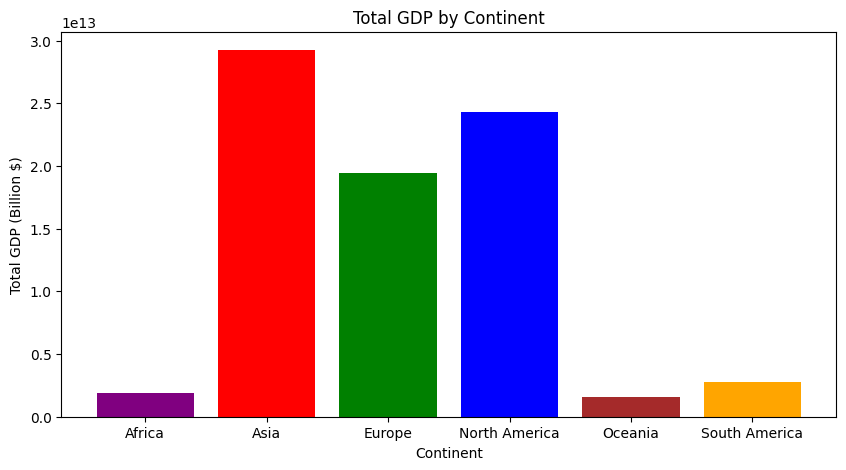

In [49]:
import matplotlib.pyplot as plt

continent_gdp = pop_gdp2020.groupby("Continent")["2020 Gdp"].sum().reset_index()

colors = {
    "North America" : "blue",
    "Asia" : "red",
    "Europe": "green",
    "South America" : "orange",
    "Africa" : "purple",
    "Oceania" : "brown"
}

bar_color = [colors[continent] for continent in continent_gdp["Continent"]]
#plot
plt.figure(figsize=(10,5))
plt.bar(continent_gdp["Continent"], continent_gdp["2020 Gdp"], color=bar_color)

#labels and titles
plt.xlabel("Continent")
plt.ylabel("Total GDP (Billion $)")
plt.title("Total GDP by Continent")
#plt.xtics(rot=45)

#display
plt.show()

In [50]:
print(pop_gdp2020.groupby("Continent")["2020 Gdp"].sum())

Continent
Africa           1.904233e+12
Asia             2.925511e+13
Europe           1.942242e+13
North America    2.429089e+13
Oceania          1.578879e+12
South America    2.793449e+12
Name: 2020 Gdp, dtype: float64


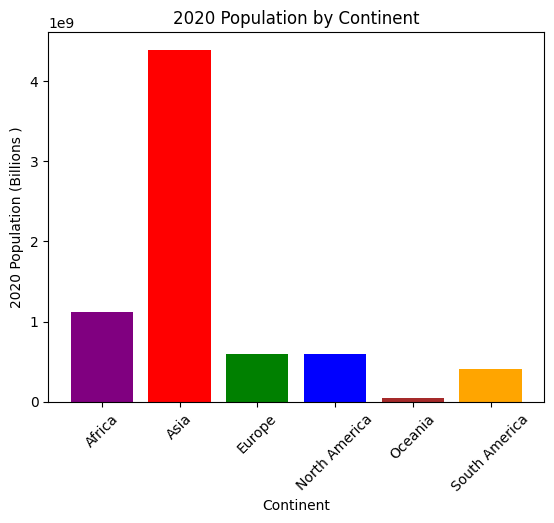

In [64]:
import matplotlib.pyplot as plt

continent_pop20 = pop_gdp2020.groupby("Continent")["2020 Population"].sum().reset_index()

colors ={
    "North America" : "blue",
    "Africa": "purple",
    "Asia": "red",
    "Europe": "green",
    "Oceania": "brown",
    "South America": "orange"
}

#fix double plot
plt.close('all')
bar_color = [colors[continent] for continent in continent_pop20["Continent"]]

plt.bar(continent_pop20["Continent"], continent_pop20["2020 Population"], color= bar_color)
#plt.figure(figsize=(10, 5))

#set labels and title
plt.xlabel("Continent")
plt.ylabel("2020 Population (Billions )")
plt.title("2020 Population by Continent")
plt.xticks(rotation=45)

#Display
plt.show()

In [67]:
print(pop_gdp2020.groupby('Continent')['2020 Population'].sum())

Continent
Africa           1122863456
Asia             4393823440
Europe            594546553
North America     592519291
Oceania            43788867
South America     402744874
Name: 2020 Population, dtype: int64
